# TASK #1: PROJECT OVERVIEW

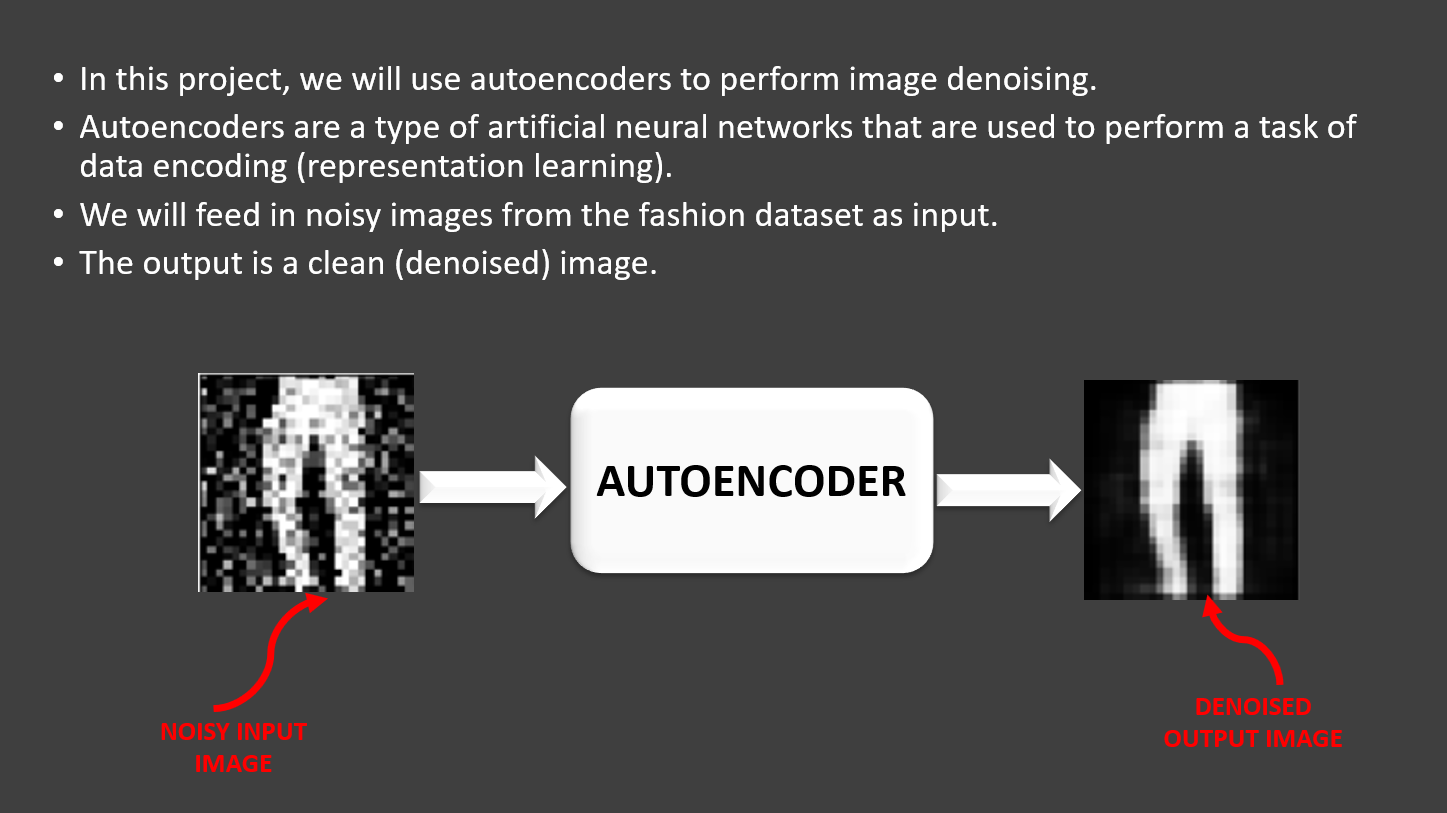

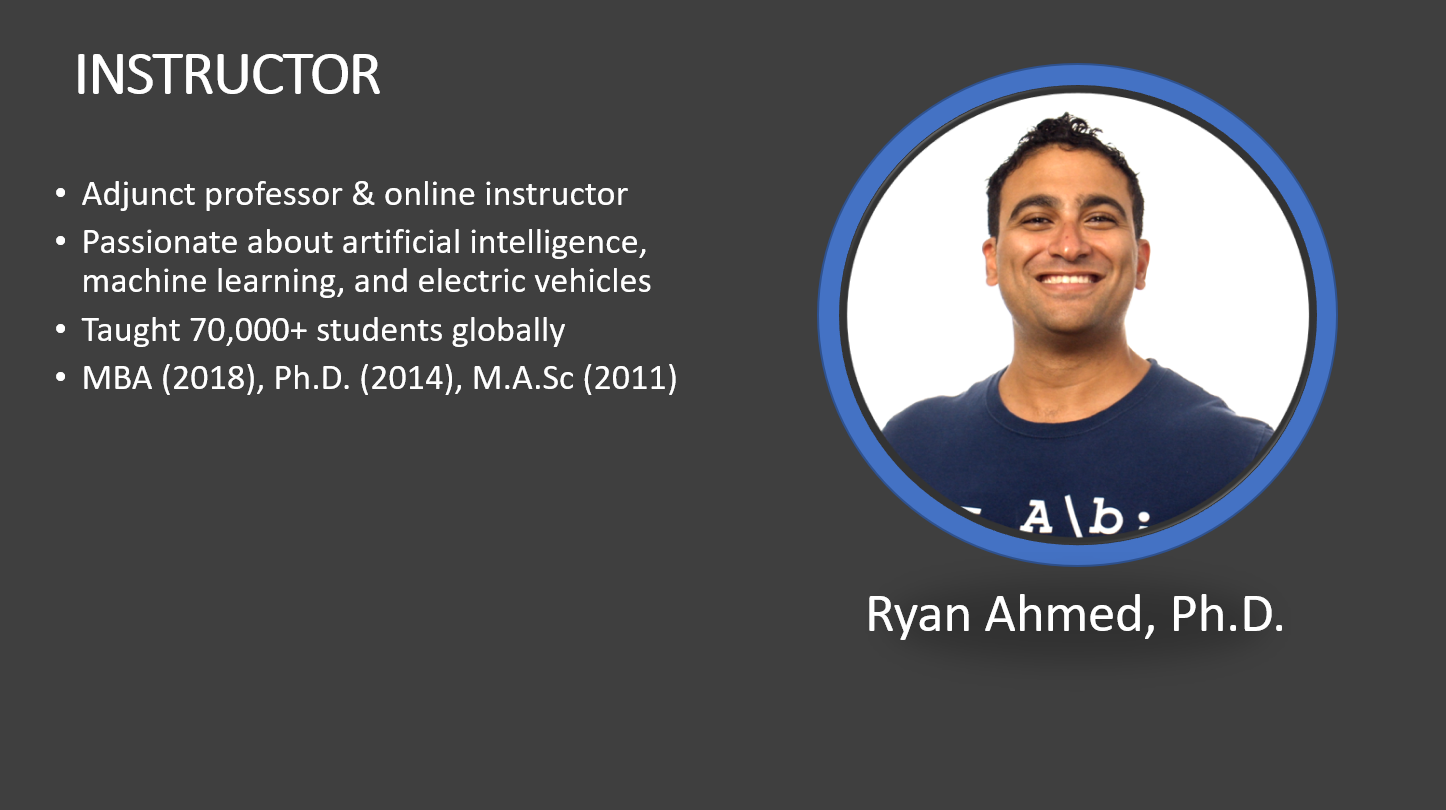

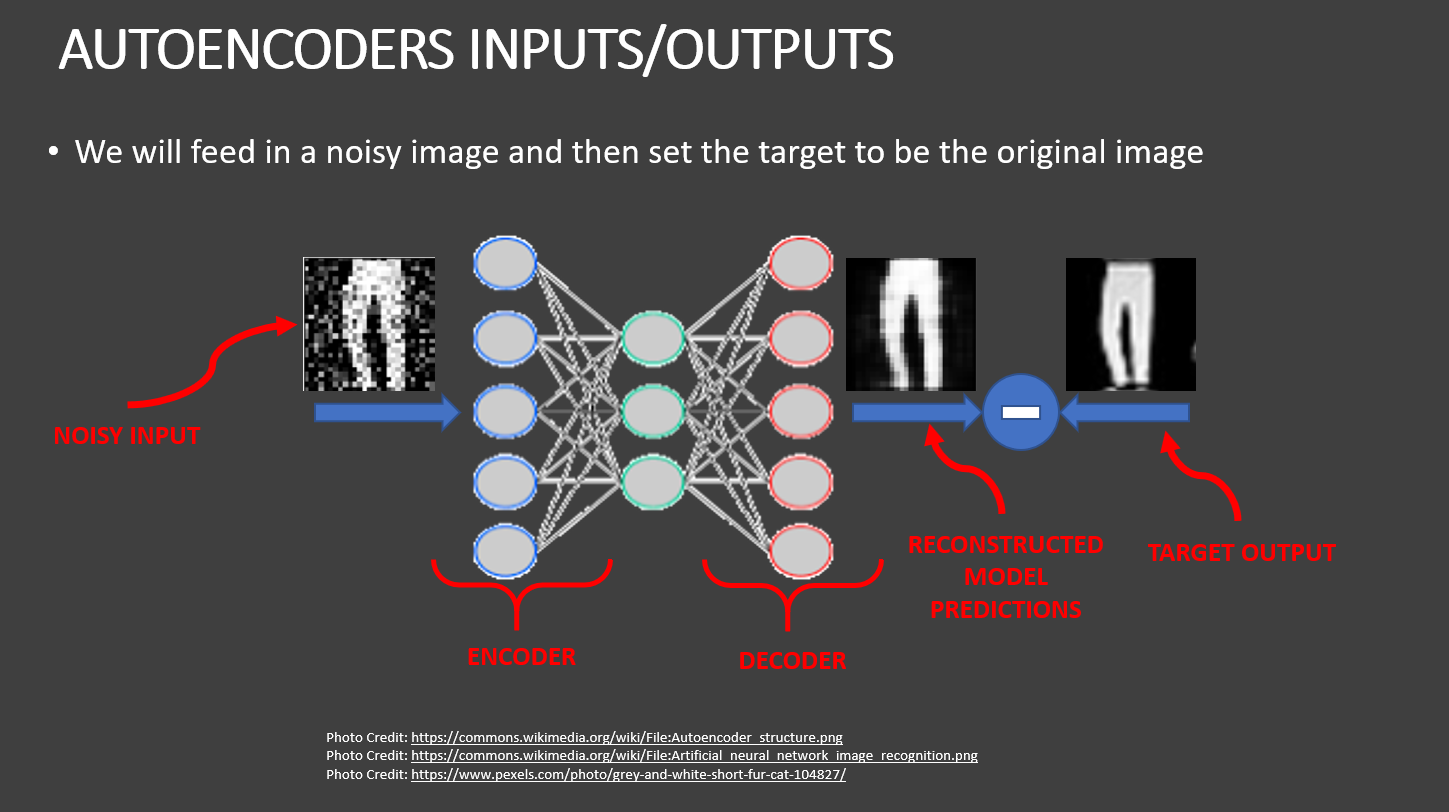

# TASK #2: IMPORT LIBRARIES AND DATASET

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

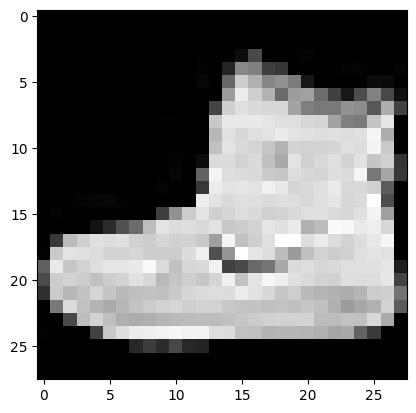

In [6]:
# Visualize a sample image
plt.imshow(x_train[0], cmap = 'gray')

In [7]:
# check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [8]:
# check out the shape of the testing data
x_test.shape


(10000, 28, 28)

# TASK #3: PERFORM DATA VISUALIZATION

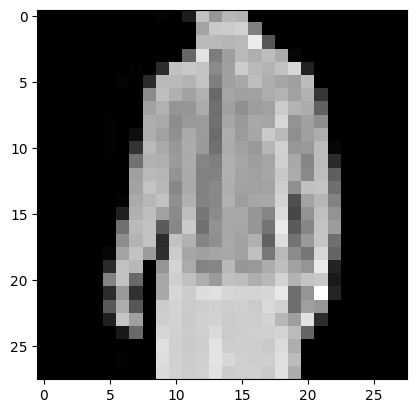

In [9]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(x_train[i], cmap = 'gray')


In [10]:
label = y_train[i]
label



4

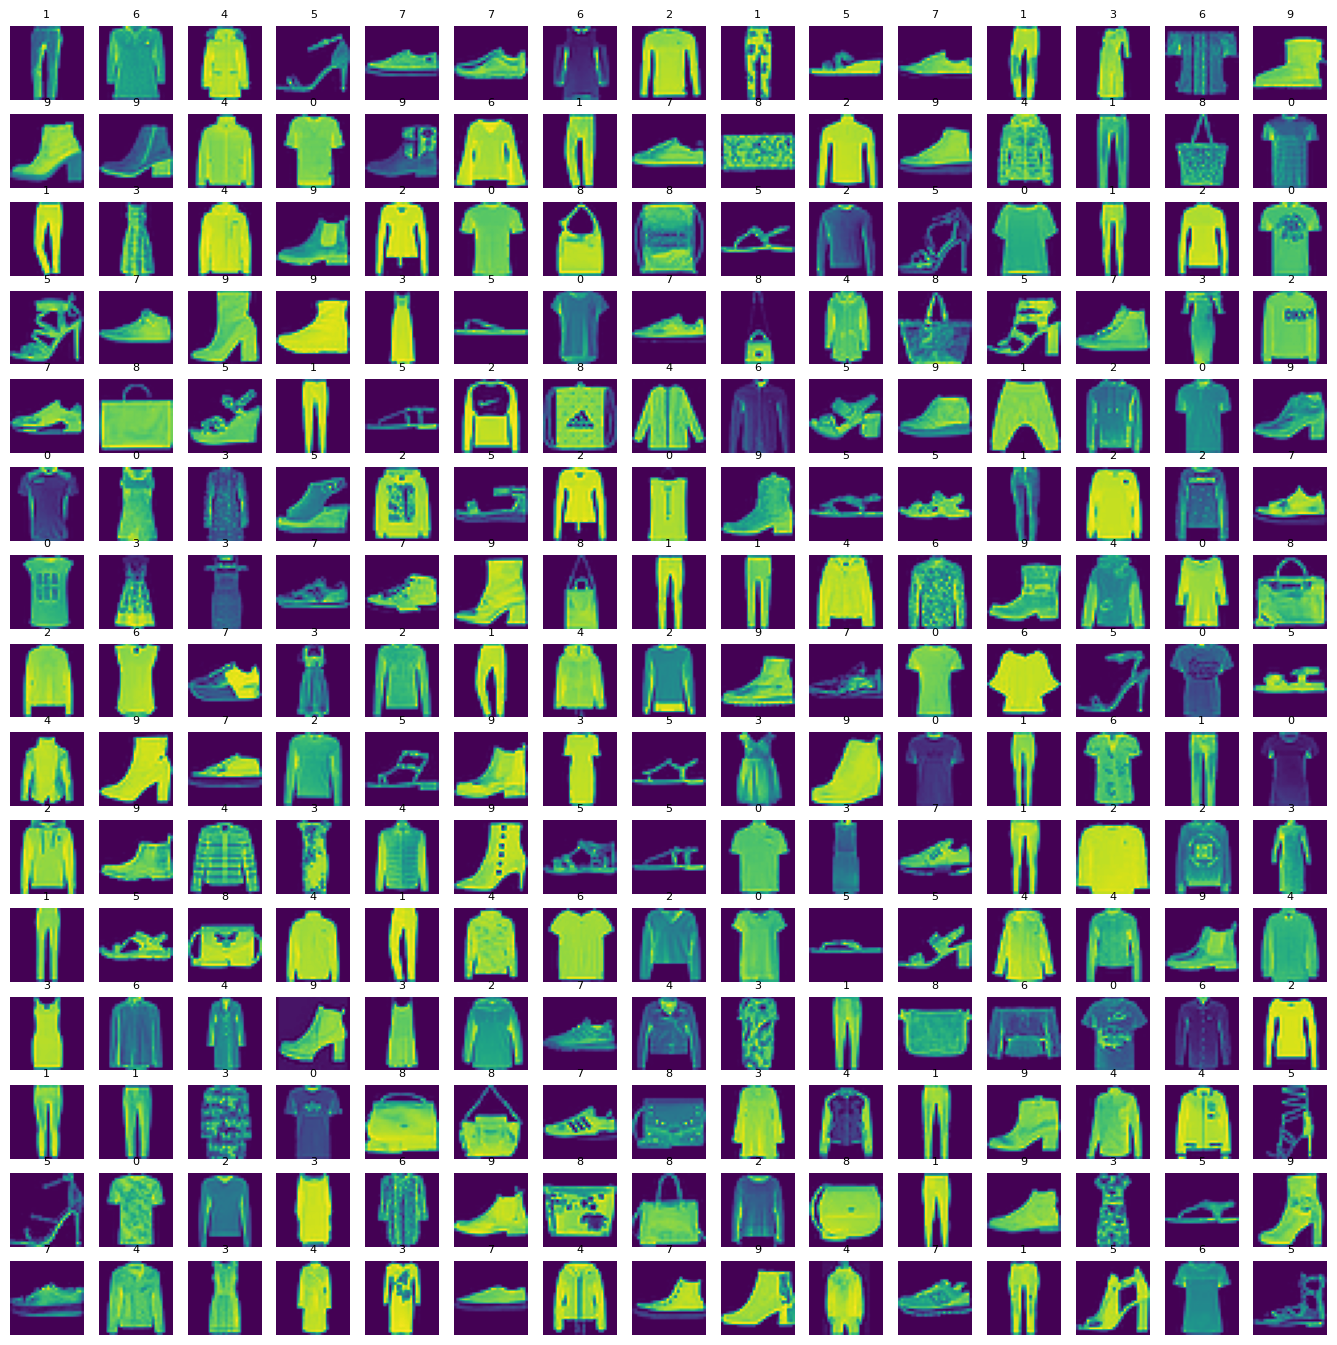

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')


# TASK #4: PERFORM DATA PREPROCESSING

In [12]:
# normalize data
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
# add some noise
noise_factor = 0.3

noise_dataset = []

for img in x_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [25]:
noise_dataset = np.array(noise_dataset)

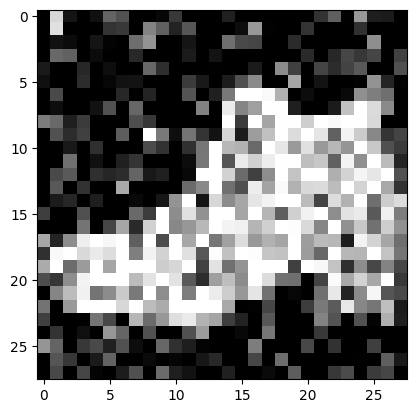

In [15]:
plt.imshow(noise_dataset[15], cmap='gray')

In [16]:
# add noise to testing dataset
noise_factor = 0.3

noise_test_dataset = []

for img in x_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [26]:
noise_test_dataset = np.array(noise_test_dataset)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

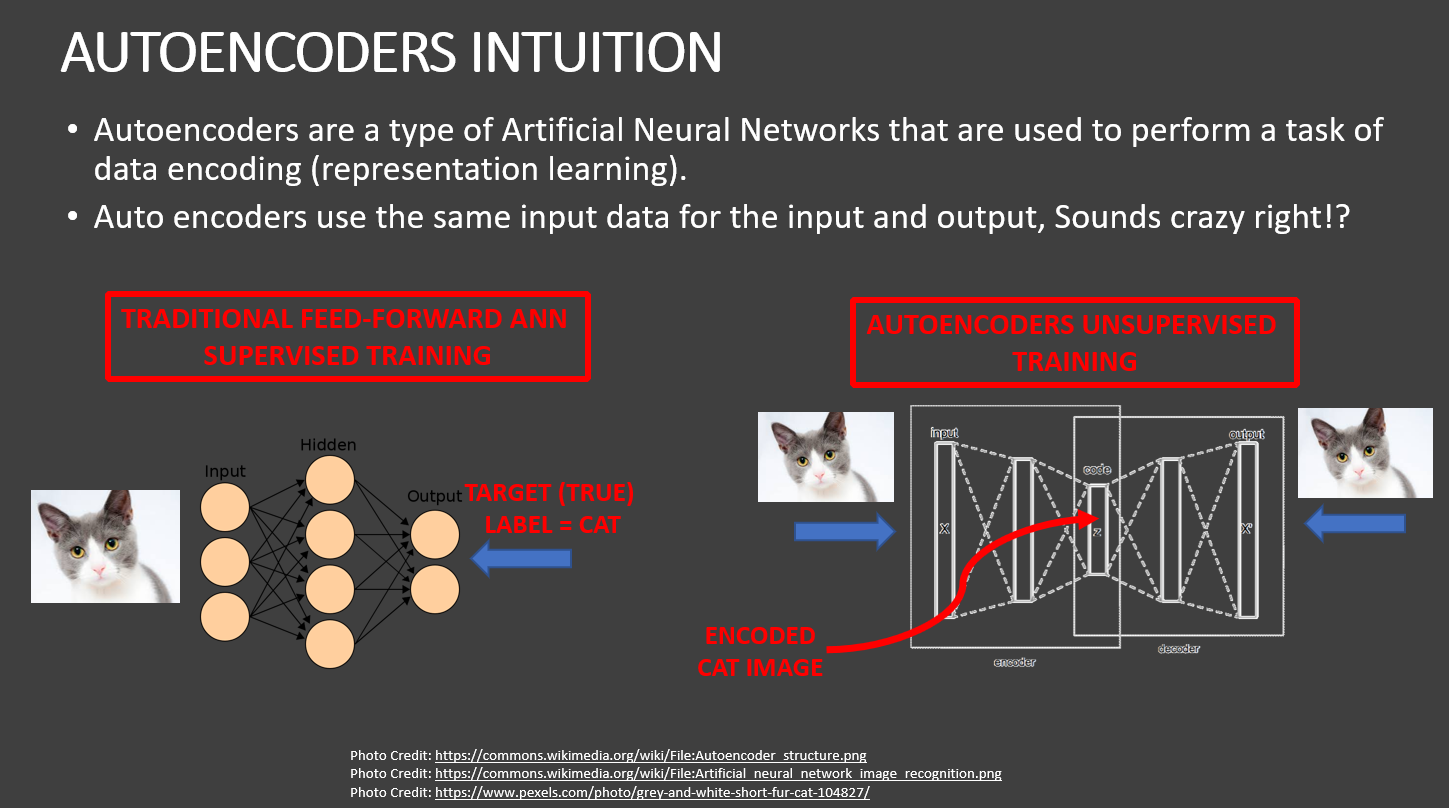

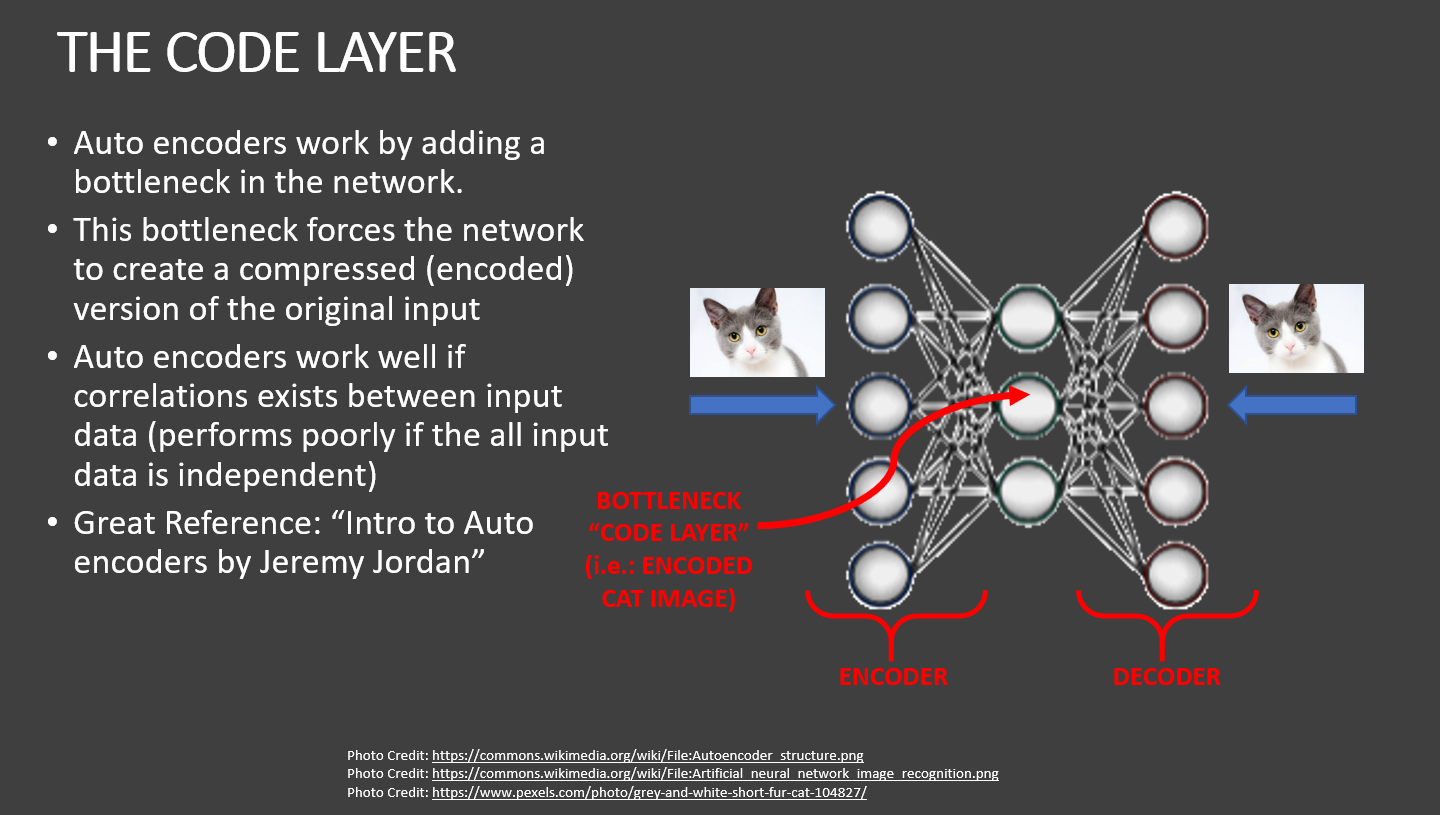

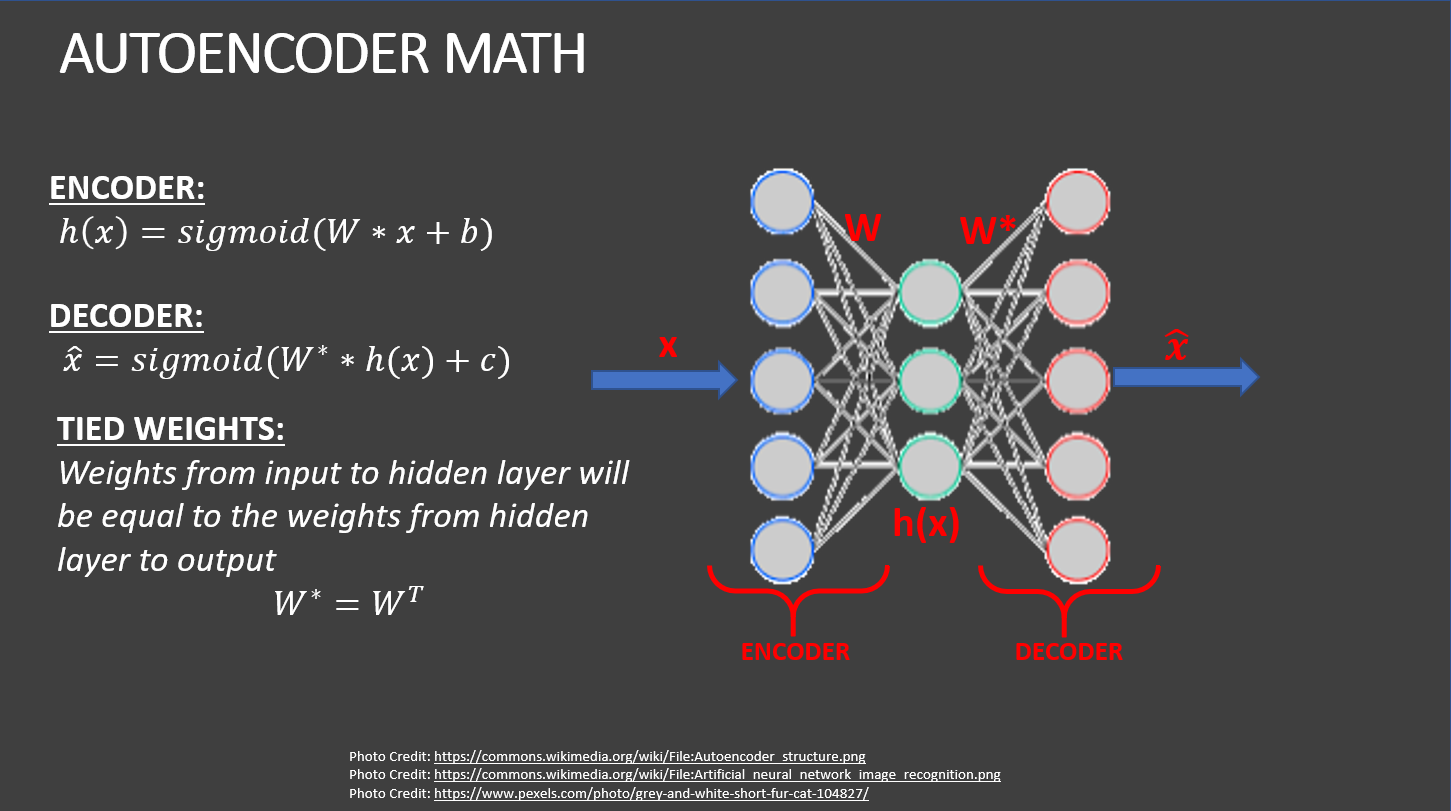

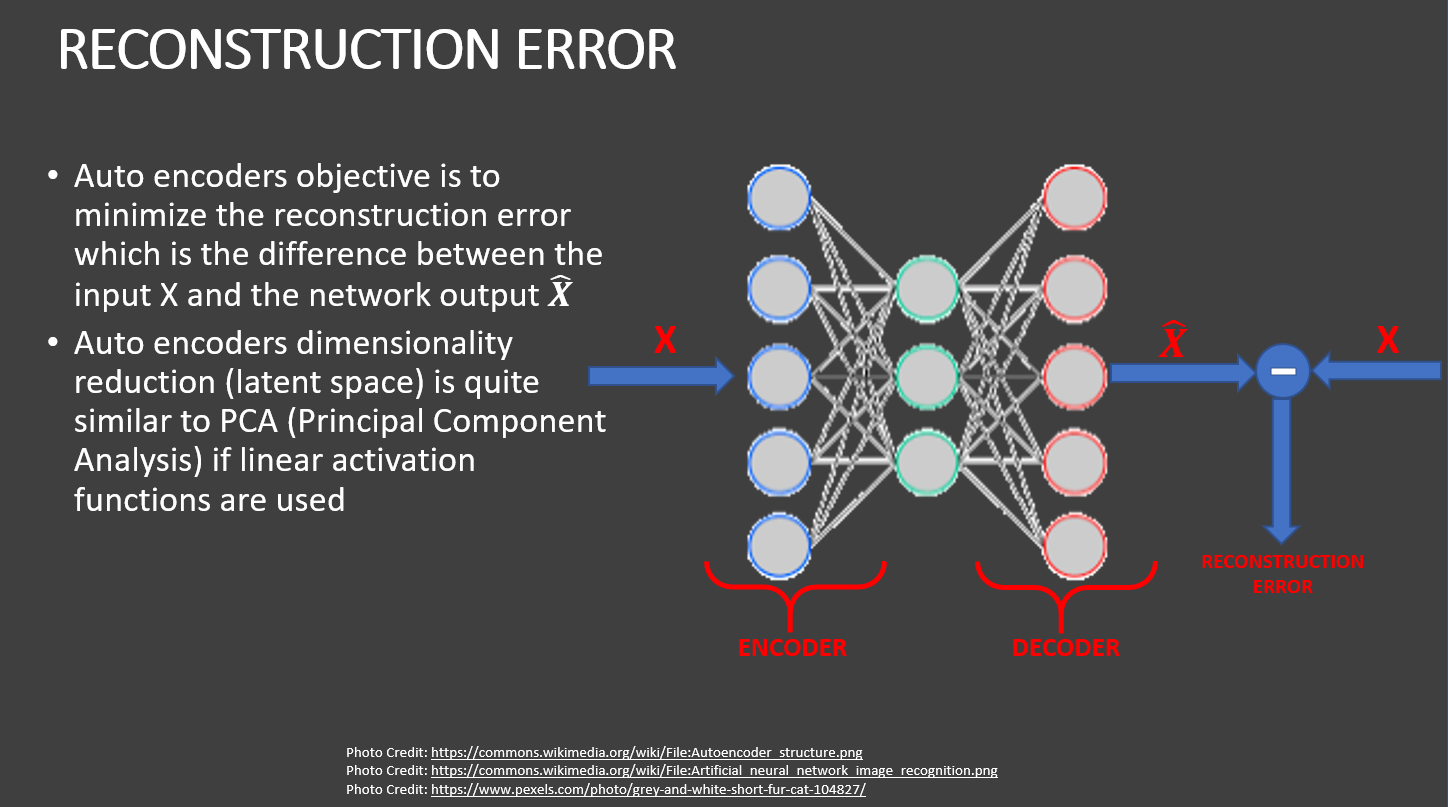

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [20]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), strides = 2, padding = 'same', input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), strides = 2, padding = 'same'))
#encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), strides = 1, padding = 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = (3, 3), strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = (3, 3), strides = 2, activation= 'sigmoid', padding = 'same'))

In [22]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-traina

In [28]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 10s 35ms/step - loss: 0.3000 - val_loss: 0.3026
Epoch 2/10
300/300 [==============================] - 10s 34ms/step - loss: 0.2998 - val_loss: 0.3019
Epoch 3/10
300/300 [==============================] - 10s 33ms/step - loss: 0.2996 - val_loss: 0.3018
Epoch 4/10
300/300 [==============================] - 9s 31ms/step - loss: 0.2994 - val_loss: 0.3016
Epoch 5/10
300/300 [==============================] - 9s 31ms/step - loss: 0.2993 - val_loss: 0.3015
Epoch 6/10
300/300 [==============================] - 10s 34ms/step - loss: 0.2992 - val_loss: 0.3015
Epoch 7/10
300/300 [==============================] - 10s 33ms/step - loss: 0.2991 - val_loss: 0.3013
Epoch 8/10
300/300 [==============================] - 9s 30ms/step - loss: 0.2990 - val_loss: 0.3013
Epoch 9/10
300/300 [==============================] - 9s 30ms/step - loss: 0.2990 - val_loss: 0.3013
Epoch 10/10
300/300 [==============================] - 9s 31ms/step - loss: 0.2989 - v

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [34]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 3ms/step - loss: 0.3011
Test Accuracy : 0.301


In [35]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 36ms/step


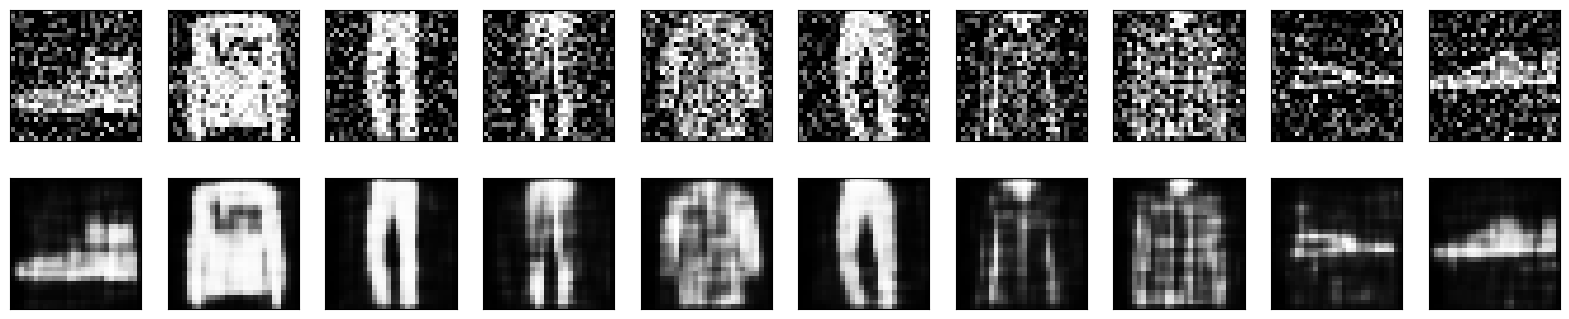

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot